In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape và normalize
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(x_train)


In [ ]:
# Mnist CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    #bloc 1
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    #bloc 2
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    #fully connected layers
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 331,754 (1.27 MB)

 Trainable params: 330,858 (1.26 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
from tensorflow.keras.optimizers import Adam

# Sử dụng Adam với learning rate thấp 
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [5]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1),
    ModelCheckpoint(filepath='best_mnist.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
]


In [6]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=50,
    validation_data=(x_test, y_test),
    callbacks=callbacks,
    verbose=1
)


Epoch 1/50
936/938 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7862 - loss: 0.7205
Epoch 1: val_accuracy improved from None to 0.98370, saving model to best_mnist.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 36s 36ms/step - accuracy: 0.8922 - loss: 0.3515 - val_accuracy: 0.9837 - val_loss: 0.0529 - learning_rate: 0.0010
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9605 - loss: 0.1288
Epoch 2: val_accuracy improved from 0.98370 to 0.99160, saving model to best_mnist.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.9637 - loss: 0.1186 - val_accuracy: 0.9916 - val_loss: 0.0256 - learning_rate: 0.0010
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9699 - loss: 0.0982
Epoch 3: val_accuracy improved from 0.99160 to 0.99230, saving model to best_mnist.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 62s 66ms/step - accuracy: 0.9711 - loss: 0.0948 - val_accuracy: 0.9923 - val_loss: 0.0230 - learning_rate: 0.0010
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9749 - loss: 0.0800
Epoch 4: val_accuracy improved from 0.99230 to 0.99260, saving model to best_mnist.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 67s 71ms/step - accuracy: 0.9756 - loss: 0.0789 - val_accuracy: 0.9926 - val_loss: 0.0219 - learning_rate: 0.0010
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9787 - loss: 0.0696
Epoch 5: val_accuracy did not improve from 0.99260
938/938 ━━━━━━━━━━━━━━━━━━━━ 68s 72ms/step - accuracy: 0.9786 - loss: 0.0702 - val_accuracy: 0.9890 - val_loss: 0.0318 - learning_rate: 0.0010
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9797 - loss: 0.0664
Epoch 6: val_accuracy did not improve from 0.99260
938/938 ━━━━━━━━━━━━━━━━━━━━ 58s 61ms/step - accuracy: 0.9804 - loss: 0.0643 - val_accuracy: 0.9904 - val_loss: 0.0295 - learning_rate: 0.0010
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9814 - loss: 0.0599
Epoch 7: val_accuracy improved from 0.99260 to 0.99410, saving model to best_mnist.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9816 - loss: 0.0589 - val_accuracy: 0.9941 - val_loss: 0.0179 - learning_rate: 0.0010
Epoch 8/50
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9814 - loss: 0.0612
Epoch 8: val_accuracy improved from 0.99410 to 0.99470, saving model to best_mnist.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9825 - loss: 0.0578 - val_accuracy: 0.9947 - val_loss: 0.0160 - learning_rate: 0.0010
Epoch 9/50
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9864 - loss: 0.0488
Epoch 9: val_accuracy improved from 0.99470 to 0.99520, saving model to best_mnist.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9853 - loss: 0.0512 - val_accuracy: 0.9952 - val_loss: 0.0144 - learning_rate: 0.0010
Epoch 10/50
936/938 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9846 - loss: 0.0508
Epoch 10: val_accuracy improved from 0.99520 to 0.99590, saving model to best_mnist.h5


938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9852 - loss: 0.0485 - val_accuracy: 0.9959 - val_loss: 0.0150 - learning_rate: 0.0010
Epoch 11/50
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9850 - loss: 0.0473
Epoch 11: val_accuracy did not improve from 0.99590
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9862 - loss: 0.0458 - val_accuracy: 0.9924 - val_loss: 0.0247 - learning_rate: 0.0010
Epoch 12/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9872 - loss: 0.0419
Epoch 12: val_accuracy did not improve from 0.99590
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9867 - loss: 0.0445 - val_accuracy: 0.9939 - val_loss: 0.0183 - learning_rate: 0.0010
Epoch 13/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9871 - loss: 0.0412
Epoch 13: val_accuracy did not improve from 0.99590
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.9866 - loss: 0.0426 - val_accuracy: 0.9936 - val_loss: 0.0171 - learning_rate: 0.0010
Epoch 14

938/938 ━━━━━━━━━━━━━━━━━━━━ 62s 53ms/step - accuracy: 0.9907 - loss: 0.0305 - val_accuracy: 0.9960 - val_loss: 0.0120 - learning_rate: 5.0000e-04
Epoch 18/50
936/938 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9916 - loss: 0.0286
Epoch 18: val_accuracy did not improve from 0.99600
938/938 ━━━━━━━━━━━━━━━━━━━━ 59s 63ms/step - accuracy: 0.9906 - loss: 0.0308 - val_accuracy: 0.9957 - val_loss: 0.0140 - learning_rate: 5.0000e-04
Epoch 19/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9914 - loss: 0.0282
Epoch 19: val_accuracy did not improve from 0.99600
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.9914 - loss: 0.0285 - val_accuracy: 0.9956 - val_loss: 0.0135 - learning_rate: 5.0000e-04
Epoch 20/50
936/938 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9917 - loss: 0.0288
Epoch 20: val_accuracy did not improve from 0.99600
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9918 - loss: 0.0278 - val_accuracy: 0.9959 - val_loss: 0.0113 - learning_rate: 5.0

938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9923 - loss: 0.0252 - val_accuracy: 0.9969 - val_loss: 0.0102 - learning_rate: 2.5000e-04
Epoch 27/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9928 - loss: 0.0233
Epoch 27: val_accuracy did not improve from 0.99690
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9929 - loss: 0.0229 - val_accuracy: 0.9965 - val_loss: 0.0109 - learning_rate: 2.5000e-04
Epoch 28/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9934 - loss: 0.0210
Epoch 28: val_accuracy did not improve from 0.99690
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.9931 - loss: 0.0224 - val_accuracy: 0.9964 - val_loss: 0.0113 - learning_rate: 2.5000e-04
Epoch 29/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9936 - loss: 0.0206
Epoch 29: val_accuracy did not improve from 0.99690
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 40ms/step - accuracy: 0.9935 - loss: 0.0217 - val_accuracy: 0.9962 - val_loss: 0.0121 - learning_rate: 2.5

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np


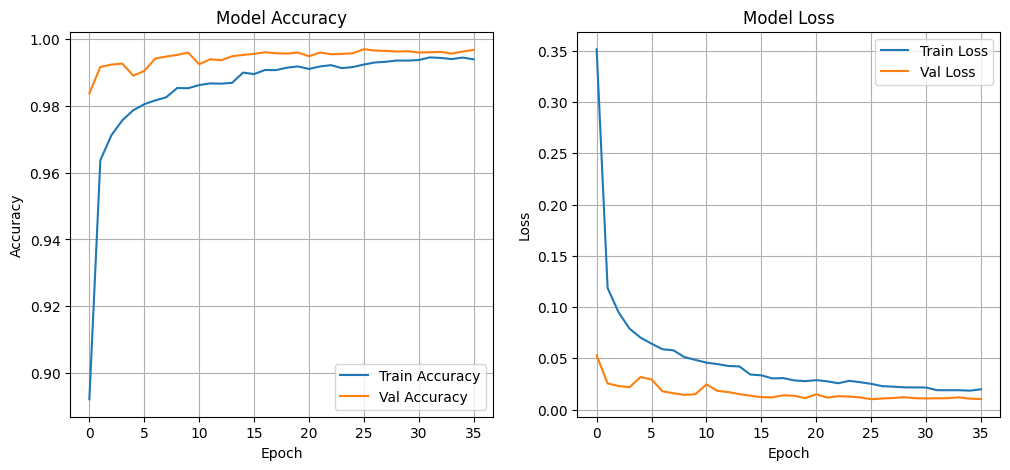

In [8]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


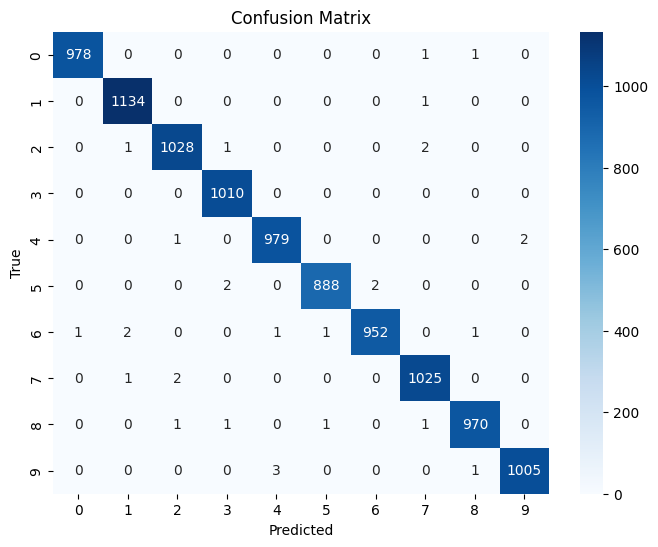

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       1.00      1.00      1.00      1010
           4       1.00      1.00      1.00       982
           5       1.00      1.00      1.00       892
           6       1.00      0.99      1.00       958
           7       1.00      1.00      1.00      1028
           8       1.00      1.00      1.00       974
           9       1.00      1.00      1.00      1009

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [9]:
# Dự đoán nhãn
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Ma trận nhầm lẫn
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(classification_report(y_true, y_pred_classes))


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 64, 64 
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=180,        # xoay bất kỳ góc
    width_shift_range=0.2,     # dịch ngang
    height_shift_range=0.2,    # dịch dọc
    shear_range=0.2,           # nghiêng
    zoom_range=[0.7,1.3],      # phóng to / thu nhỏ
    horizontal_flip=True,      
    vertical_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    'archive\geometric shapes dataset',
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    'archive\geometric shapes dataset',
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 24000 images belonging to 3 classes.
Found 6000 images belonging to 3 classes.


In [ ]:
# Model hinh hoc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

num_classes = len(train_generator.class_indices)  # số lớp trong dataset

model = Sequential()

# --- Conv block 1 ---
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(img_height,img_width,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

# --- Conv block 2 ---
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

# --- Conv block 3 ---
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

# --- Dense block ---
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,274,243 (4.86 MB)

 Trainable params: 1,273,795 (4.86 MB)

 Non-trainable params: 448 (1.75 KB)

In [12]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1),
    ModelCheckpoint(filepath='best_shapes.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
]


In [16]:
num_epochs = 50

history = model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=validation_generator,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/50
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3585 - loss: 1.0935
Epoch 1: val_accuracy improved from None to 0.38583, saving model to best_shapes.h5


750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.3559 - loss: 1.0945 - val_accuracy: 0.3858 - val_loss: 1.3248 - learning_rate: 0.0010
Epoch 2/50
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3684 - loss: 1.0875
Epoch 2: val_accuracy did not improve from 0.38583
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.3699 - loss: 1.0839 - val_accuracy: 0.3848 - val_loss: 1.0777 - learning_rate: 0.0010
Epoch 3/50
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3767 - loss: 1.0802
Epoch 3: val_accuracy did not improve from 0.38583
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.3782 - loss: 1.0775 - val_accuracy: 0.3855 - val_loss: 1.0746 - learning_rate: 0.0010
Epoch 4/50
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3936 - loss: 1.0689
Epoch 4: val_accuracy improved from 0.38583 to 0.39733, saving model to best_shapes.h5


750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.3923 - loss: 1.0655 - val_accuracy: 0.3973 - val_loss: 1.0612 - learning_rate: 0.0010
Epoch 5/50
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4033 - loss: 1.0541
Epoch 5: val_accuracy improved from 0.39733 to 0.42833, saving model to best_shapes.h5


750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.4063 - loss: 1.0488 - val_accuracy: 0.4283 - val_loss: 1.0354 - learning_rate: 0.0010
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4144 - loss: 1.0432
Epoch 6: val_accuracy improved from 0.42833 to 0.46950, saving model to best_shapes.h5


750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.4175 - loss: 1.0400 - val_accuracy: 0.4695 - val_loss: 0.9874 - learning_rate: 0.0010
Epoch 7/50
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.4466 - loss: 1.0169
Epoch 7: val_accuracy improved from 0.46950 to 0.52650, saving model to best_shapes.h5


750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - accuracy: 0.4591 - loss: 0.9986 - val_accuracy: 0.5265 - val_loss: 0.9336 - learning_rate: 0.0010
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4750 - loss: 0.9777
Epoch 8: val_accuracy improved from 0.52650 to 0.59300, saving model to best_shapes.h5


750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.4909 - loss: 0.9647 - val_accuracy: 0.5930 - val_loss: 0.8764 - learning_rate: 0.0010
Epoch 9/50
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4953 - loss: 0.9518
Epoch 9: val_accuracy did not improve from 0.59300
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.5005 - loss: 0.9497 - val_accuracy: 0.5772 - val_loss: 0.8654 - learning_rate: 0.0010
Epoch 10/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5234 - loss: 0.9139
Epoch 10: val_accuracy improved from 0.59300 to 0.66433, saving model to best_shapes.h5


750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.5320 - loss: 0.9071 - val_accuracy: 0.6643 - val_loss: 0.7772 - learning_rate: 0.0010
Epoch 11/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5560 - loss: 0.8681
Epoch 11: val_accuracy did not improve from 0.66433
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - accuracy: 0.5657 - loss: 0.8455 - val_accuracy: 0.6510 - val_loss: 0.7578 - learning_rate: 0.0010
Epoch 12/50
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5939 - loss: 0.8043
Epoch 12: val_accuracy improved from 0.66433 to 0.75550, saving model to best_shapes.h5


750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.6036 - loss: 0.7947 - val_accuracy: 0.7555 - val_loss: 0.6314 - learning_rate: 0.0010
Epoch 13/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6226 - loss: 0.7630
Epoch 13: val_accuracy did not improve from 0.75550
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.6384 - loss: 0.7394 - val_accuracy: 0.6517 - val_loss: 1.0476 - learning_rate: 0.0010
Epoch 14/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6714 - loss: 0.6866
Epoch 14: val_accuracy did not improve from 0.75550
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.6788 - loss: 0.6742 - val_accuracy: 0.7168 - val_loss: 0.7015 - learning_rate: 0.0010
Epoch 15/50
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7048 - loss: 0.6307
Epoch 15: val_accuracy improved from 0.75550 to 0.80967, saving model to best_shapes.h5


750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.7137 - loss: 0.6087 - val_accuracy: 0.8097 - val_loss: 0.4447 - learning_rate: 0.0010
Epoch 16/50
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7394 - loss: 0.5616
Epoch 16: val_accuracy did not improve from 0.80967
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.7462 - loss: 0.5473 - val_accuracy: 0.7992 - val_loss: 0.4939 - learning_rate: 0.0010
Epoch 17/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7649 - loss: 0.5079
Epoch 17: val_accuracy improved from 0.80967 to 0.88500, saving model to best_shapes.h5


750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.7650 - loss: 0.5067 - val_accuracy: 0.8850 - val_loss: 0.3170 - learning_rate: 0.0010
Epoch 18/50
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7759 - loss: 0.4858
Epoch 18: val_accuracy did not improve from 0.88500
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.7880 - loss: 0.4704 - val_accuracy: 0.5112 - val_loss: 6.7785 - learning_rate: 0.0010
Epoch 19/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8117 - loss: 0.4321
Epoch 19: val_accuracy did not improve from 0.88500
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.8146 - loss: 0.4230 - val_accuracy: 0.7437 - val_loss: 1.1594 - learning_rate: 0.0010
Epoch 20/50
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8248 - loss: 0.4003
Epoch 20: val_accuracy did not improve from 0.88500
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 59ms/step - accuracy: 0.8306 - loss: 0.3904 - val_accuracy: 0.8655 - val_loss: 0.3810 - learning_rate: 0.0010
Epoch 21

750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.8420 - loss: 0.3733 - val_accuracy: 0.8992 - val_loss: 0.2420 - learning_rate: 0.0010
Epoch 22/50
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8490 - loss: 0.3623
Epoch 22: val_accuracy did not improve from 0.89917
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.8518 - loss: 0.3488 - val_accuracy: 0.8455 - val_loss: 0.4873 - learning_rate: 0.0010
Epoch 23/50
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8579 - loss: 0.3360
Epoch 23: val_accuracy did not improve from 0.89917
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.8596 - loss: 0.3333 - val_accuracy: 0.8882 - val_loss: 0.2539 - learning_rate: 0.0010
Epoch 24/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8626 - loss: 0.3196
Epoch 24: val_accuracy improved from 0.89917 to 0.92333, saving model to best_shapes.h5


750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.8671 - loss: 0.3139 - val_accuracy: 0.9233 - val_loss: 0.1826 - learning_rate: 0.0010
Epoch 25/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8701 - loss: 0.3103
Epoch 25: val_accuracy improved from 0.92333 to 0.92733, saving model to best_shapes.h5


750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 53ms/step - accuracy: 0.8746 - loss: 0.2981 - val_accuracy: 0.9273 - val_loss: 0.1944 - learning_rate: 0.0010
Epoch 26/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8758 - loss: 0.3002
Epoch 26: val_accuracy did not improve from 0.92733
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.8735 - loss: 0.3057 - val_accuracy: 0.8802 - val_loss: 0.2547 - learning_rate: 0.0010
Epoch 27/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8781 - loss: 0.2974
Epoch 27: val_accuracy did not improve from 0.92733
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 51ms/step - accuracy: 0.8805 - loss: 0.2914 - val_accuracy: 0.8972 - val_loss: 0.2254 - learning_rate: 0.0010
Epoch 28/50
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8843 - loss: 0.2846
Epoch 28: val_accuracy did not improve from 0.92733
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.8818 - loss: 0.2875 - val_accuracy: 0.9182 - val_loss: 0.2134 - learning_rate: 0.0010
Epoch 29

750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.8910 - loss: 0.2626 - val_accuracy: 0.9470 - val_loss: 0.1410 - learning_rate: 0.0010
Epoch 30/50
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8966 - loss: 0.2493
Epoch 30: val_accuracy did not improve from 0.94700
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.8942 - loss: 0.2544 - val_accuracy: 0.9333 - val_loss: 0.1577 - learning_rate: 0.0010
Epoch 31/50
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8952 - loss: 0.2542
Epoch 31: val_accuracy did not improve from 0.94700
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.8967 - loss: 0.2503 - val_accuracy: 0.8817 - val_loss: 0.2687 - learning_rate: 0.0010
Epoch 32/50
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8958 - loss: 0.2508
Epoch 32: val_accuracy did not improve from 0.94700
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.8929 - loss: 0.2547 - val_accuracy: 0.9397 - val_loss: 0.1420 - learning_rate: 0.0010
Epoch 33

750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.9208 - loss: 0.1894 - val_accuracy: 0.9540 - val_loss: 0.1116 - learning_rate: 5.0000e-04
Epoch 38/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9176 - loss: 0.1990
Epoch 38: val_accuracy did not improve from 0.95400
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 53ms/step - accuracy: 0.9208 - loss: 0.1925 - val_accuracy: 0.9510 - val_loss: 0.1105 - learning_rate: 5.0000e-04
Epoch 39/50
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9212 - loss: 0.1918
Epoch 39: val_accuracy did not improve from 0.95400
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.9230 - loss: 0.1873 - val_accuracy: 0.9497 - val_loss: 0.1142 - learning_rate: 5.0000e-04
Epoch 40/50
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9231 - loss: 0.1911
Epoch 40: val_accuracy did not improve from 0.95400
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.9232 - loss: 0.1937 - val_accuracy: 0.9535 - val_loss: 0.1224 - learning_rate: 5.0

750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.9229 - loss: 0.1850 - val_accuracy: 0.9630 - val_loss: 0.0990 - learning_rate: 5.0000e-04
Epoch 43/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9230 - loss: 0.1829
Epoch 43: val_accuracy did not improve from 0.96300
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.9235 - loss: 0.1830 - val_accuracy: 0.8920 - val_loss: 0.2314 - learning_rate: 5.0000e-04
Epoch 44/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9219 - loss: 0.1833
Epoch 44: val_accuracy improved from 0.96300 to 0.96883, saving model to best_shapes.h5


750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.9252 - loss: 0.1769 - val_accuracy: 0.9688 - val_loss: 0.0890 - learning_rate: 5.0000e-04
Epoch 45/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9277 - loss: 0.1814
Epoch 45: val_accuracy did not improve from 0.96883
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.9278 - loss: 0.1764 - val_accuracy: 0.9602 - val_loss: 0.0984 - learning_rate: 5.0000e-04
Epoch 46/50
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9289 - loss: 0.1687
Epoch 46: val_accuracy did not improve from 0.96883
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.9259 - loss: 0.1740 - val_accuracy: 0.9612 - val_loss: 0.1005 - learning_rate: 5.0000e-04
Epoch 47/50
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9268 - loss: 0.1712
Epoch 47: val_accuracy did not improve from 0.96883
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.9273 - loss: 0.1705 - val_accuracy: 0.9485 - val_loss: 0.1216 - learning_rate: 5.0

750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.9334 - loss: 0.1568 - val_accuracy: 0.9697 - val_loss: 0.0840 - learning_rate: 2.5000e-04
Restoring model weights from the end of the best epoch: 50.


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np


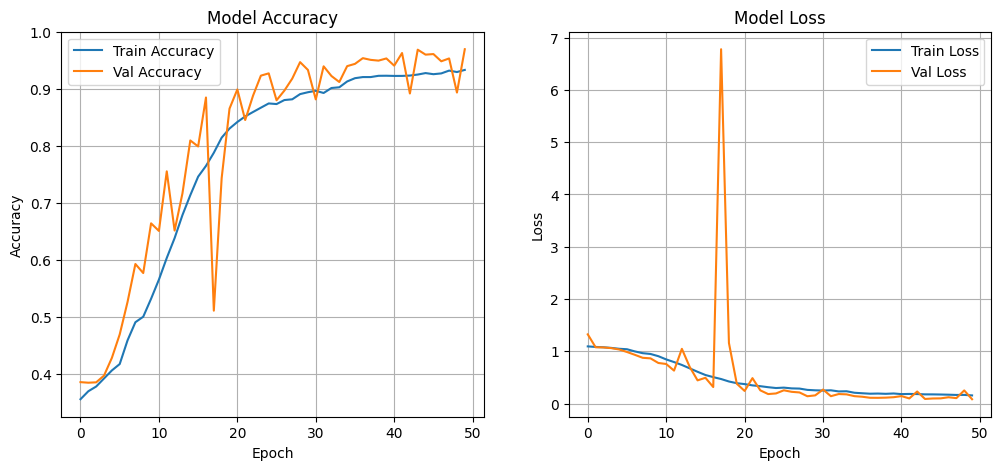

In [18]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()


188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step


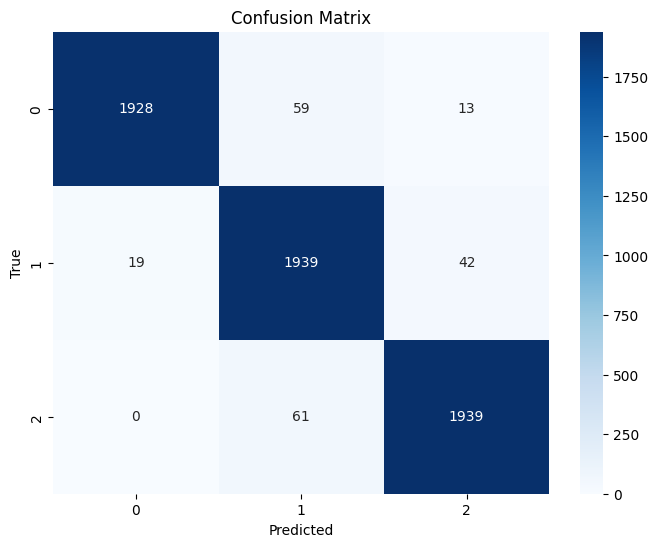

              precision    recall  f1-score   support

      Circle       0.99      0.96      0.98      2000
      Square       0.94      0.97      0.96      2000
    Triangle       0.97      0.97      0.97      2000

    accuracy                           0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000



In [19]:
# Dự đoán nhãn
validation_generator.reset()  # đảm bảo generator chạy từ đầu
y_pred = model.predict(validation_generator, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
class_labels = list(validation_generator.class_indices.keys())
print(classification_report(y_true, y_pred_classes, target_names=class_labels))
